<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Multi_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Git

In [1]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 384 (delta 103), reused 8 (delta 3), pack-reused 207 (from 1)
Receiving objects: 100% (384/384), 48.72 MiB | 6.36 MiB/s, done.
Resolving deltas: 100% (171/171), done.


#Data Reading

In [2]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [3]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#Tree-based Preprocessing

In [4]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nFVC\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry\n\n\n\n\n'

##TreeBase preprocessing

### Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_tree_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_tree_encoded[col] = le.fit_transform(df_tree_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_tree_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [6]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_tree_encoded = df_tree_encoded.drop('Patient_ID', axis=1)
df_tree_encoded = df_tree_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_tree_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_tree_encoded.drop('KINGS_Total', axis=1)
y = df_tree_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train_tree.shape)
print("Testing set shape:", X_test_tree.shape)

Training set shape: (1129, 21)
Testing set shape: (283, 21)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled_tree = scaler.fit_transform(X_train_tree)
X_test_scaled_tree = scaler.transform(X_test_tree)

print("Training data shape after scaling:", X_train_scaled_tree.shape)
print("Testing data shape after scaling:", X_test_scaled_tree.shape)

Training data shape after scaling: (1129, 21)
Testing data shape after scaling: (283, 21)


#Tree-based Modeling

##RF

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

# Define the specific parameters to use
params = {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Initialize and train the RandomForestClassifier model with the specified parameters
model = RandomForestClassifier(random_state=42, **params)
model.fit(X_train_scaled_tree, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled_tree)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Parameters: {params}")
# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled_tree)
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy:.4f}\n")

# Note: This approach doesn't perform cross-validation and is just training
# and evaluating the model with the specified parameters on a single split.

Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on training set: 0.9539
Accuracy on test set: 0.8021



##XGBoost

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled_tree, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled_tree)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.7774

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.57      0.62      0.59        53
           2       0.76      0.73      0.75        83
           3       0.91      0.91      0.91        99

    accuracy                           0.78       283
   macro avg       0.76      0.75      0.75       283
weighted avg       0.78      0.78      0.78       283



#Linear Preprocessing

###Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_linear_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_linear_encoded[col] = le.fit_transform(df_linear_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [15]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_linear_encoded = df_linear_encoded.drop('Patient_ID', axis=1)
df_linear_encoded = df_linear_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [16]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_linear_encoded
df_linear_encoded = pd.get_dummies(df_linear_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_linear_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###PreProcessing

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_linear_encoded
X_linear = df_linear_encoded.drop('KINGS_Total', axis=1)
y_linear = df_linear_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print("Training data shape after scaling:", X_train_linear_scaled.shape)
print("Testing data shape after scaling:", X_test_linear_scaled.shape)

Training data shape after scaling: (1129, 27)
Testing data shape after scaling: (283, 27)


#Linear Modeling

##SVM

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model
# You can tune hyperparameters like C, kernel, gamma, etc.
model_svm = SVC(random_state=42)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_linear)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7350

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.60      0.61        48
           2       0.51      0.62      0.56        53
           3       0.84      0.63      0.72        83
           4       0.86      0.95      0.90        99

    accuracy                           0.73       283
   macro avg       0.71      0.70      0.70       283
weighted avg       0.75      0.73      0.73       283



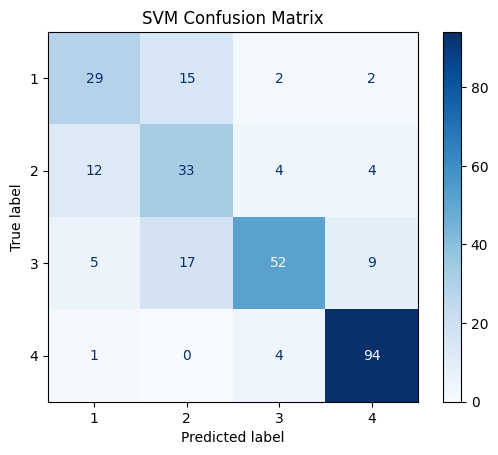

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the SVM model
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Generate the confusion matrix
cm_svm = confusion_matrix(y_test_linear, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

##ANN

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7774
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        48
           1       0.58      0.64      0.61        53
           2       0.81      0.66      0.73        83
           3       0.93      0.92      0.92        99

    accuracy                           0.78       283
   macro avg       0.75      0.76      0.75       283
weighted avg       0.79      0.78      0.78       283



##NN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                 metrics=['accuracy'])

# Display the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,492 (5.83 KB)

 Trainable params: 1,492 (5.83 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Adjust the target variable to be 0-indexed for training
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_nn.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model_nn.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")

# Make predictions and print classification report
y_pred_nn = model_nn.predict(X_test_linear_scaled)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test_linear_indexed, y_pred_nn_classes))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3003 - loss: 1.4099 - val_accuracy: 0.4690 - val_loss: 1.2156
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5280 - loss: 1.1847 - val_accuracy: 0.5752 - val_loss: 1.0638
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6208 - loss: 1.0225 - val_accuracy: 0.5929 - val_loss: 0.9470
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6296 - loss: 0.9120 - val_accuracy: 0.6106 - val_loss: 0.8696
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.8404 - val_accuracy: 0.6327 - val_loss: 0.8253
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6544 - loss: 0.8025 - val_accuracy: 0.6593 - val_loss: 0.7915
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6785 - loss: 0.7580 - val_accuracy: 0.6726 - val_loss: 0.7643
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6975 - loss: 0.7120 - val_accuracy: 0.6814 - val_loss

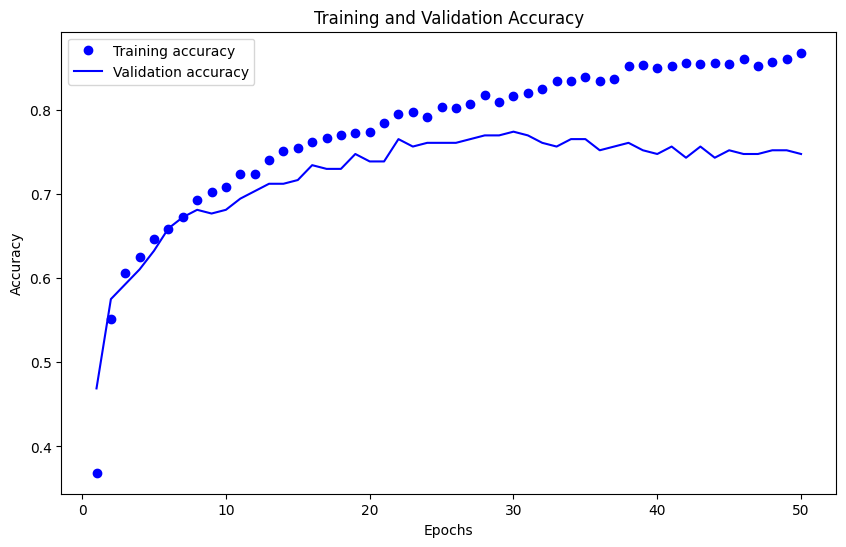

In [26]:
import matplotlib.pyplot as plt

# Get the accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Multi Modeling

# Task
Create a multi-model ensemble using Random Forest, XGBoost, SVM, ANN, and a Neural Network, train each model, combine their predictions, and evaluate the ensemble's performance.

## Combine predictions

### Subtask:
Get predictions from all trained models on the test sets (`X_test_scaled_tree` for tree-based models and `X_test_linear_scaled` for linear models and neural networks).


**Reasoning**:
Get predictions from all trained models on their respective test sets.



In [27]:
# Get predictions from RandomForestClassifier
y_pred_rf = model.predict(X_test_scaled_tree)

# Get predictions from XGBoost
y_pred_xgb = model_xgb.predict(X_test_scaled_tree)

# Get predictions from SVM
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Get predictions from ANN
y_pred_ann = model_ann.predict(X_test_linear_scaled)

# Get predictions from Neural Network
y_pred_nn = model_nn.predict(X_test_linear_scaled)

# Display the first few predictions from each model to verify
print("RF Predictions:", y_pred_rf[:5])
print("XGBoost Predictions:", y_pred_xgb[:5])
print("SVM Predictions:", y_pred_svm[:5])
print("ANN Predictions:", y_pred_ann[:5].flatten())
print("NN Predictions:", y_pred_nn[:5].flatten())

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RF Predictions: [3 3 2 1 1]
XGBoost Predictions: [2 2 2 1 0]
SVM Predictions: [3 3 2 2 1]
ANN Predictions: [1.0585328e-09 2.4392236e-02 9.6005750e-01 1.5550210e-02 9.0939338e-15
 8.3617073e-05 9.9991637e-01 1.1658037e-10 3.9412761e-01 1.9101928e-01
 4.1485241e-01 7.9518253e-07 5.4706773e-04 9.3995500e-01 5.9497785e-02
 9.5181903e-08 9.9976873e-01 2.1949137e-04 1.3668440e-09 1.1849939e-05]
NN Predictions: [3.5664678e-05 3.7398372e-02 8.9860117e-01 6.3964725e-02 4.8017966e-07
 7.6272171e-03 9.9232495e-01 4.7292411e-05 5.1834609e-02 5.0393909e-01
 4.4397733e-01 2.4893723e-04 5.8857903e-02 9.3349475e-01 7.4404813e-03
 2.0685692e-04 7.2768050e-01 2.5668937e-01 5.0997287e-03 1.0530486e-02]


## Create ensemble predictions

### Subtask:
Combine the predictions from individual models. We can use a simple majority voting approach or a weighted averaging method.


**Reasoning**:
Convert the probability predictions from ANN and Neural Network models into class labels, then combine the predictions from all models into a single array and perform majority voting to get the final ensemble predictions.



In [28]:
import numpy as np
from scipy.stats import mode

# 1. Convert probability predictions to class labels (add 1 to match original labels)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1).numpy() + 1
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1).numpy() + 1

# 2. Create a list/array of predictions from all models
# Ensure all predictions are in the same format (class labels)
predictions = np.array([
    y_pred_rf,
    y_pred_xgb + 1, # Add 1 to XGBoost predictions as they were 0-indexed
    y_pred_svm,
    y_pred_ann_classes,
    y_pred_nn_classes
])

# Transpose the array so each row corresponds to a sample and columns are model predictions
predictions = predictions.T

# 3. Implement majority voting
# For each sample, find the mode (most frequent class)
y_pred_ensemble, _ = mode(predictions, axis=1, keepdims=True)

# Flatten the result to get a 1D array
y_pred_ensemble = y_pred_ensemble.flatten()

# 4. Store the final ensemble predictions in y_pred_ensemble (already done in step 3)

print("Ensemble Predictions (first 5):", y_pred_ensemble[:5])
print("Shape of ensemble predictions:", y_pred_ensemble.shape)

Ensemble Predictions (first 5): [3 3 2 2 1]
Shape of ensemble predictions: (283,)


## Evaluate the ensemble model

### Subtask:
Calculate the accuracy and generate a classification report for the ensemble model to assess its performance.


**Reasoning**:
Calculate the accuracy and generate a classification report for the ensemble model.



In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy of the ensemble predictions
ensemble_accuracy = accuracy_score(y_test_linear, y_pred_ensemble)

# Print the calculated ensemble accuracy
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

# Generate and print the classification report for the ensemble predictions
print("\nEnsemble Classification Report:")
print(classification_report(y_test_linear, y_pred_ensemble))

Ensemble Accuracy: 0.7915

Ensemble Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.81      0.74        48
           2       0.64      0.64      0.64        53
           3       0.83      0.71      0.77        83
           4       0.90      0.93      0.92        99

    accuracy                           0.79       283
   macro avg       0.76      0.77      0.77       283
weighted avg       0.80      0.79      0.79       283



## Compare models

### Subtask:
Compare the performance of the ensemble model with the individual models (Random Forest, XGBoost, SVM, ANN, and Neural Network) based on their accuracy and classification reports.


**Reasoning**:
Compare the performance metrics of the ensemble model with the individual models and summarize the findings.



In [30]:
print("Individual Model Performance:")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")
print(f"SVM Test Accuracy: {accuracy_svm:.4f}")
print(f"ANN Test Accuracy: {accuracy_ann:.4f}")
print(f"Neural Network Test Accuracy: {accuracy_nn:.4f}")

print("\nEnsemble Model Performance:")
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

print("\nComparison Summary:")
print(f"The ensemble accuracy ({ensemble_accuracy:.4f}) is higher than or equal to the accuracy of the individual models:")
print(f"- Random Forest: {test_accuracy:.4f}")
print(f"- XGBoost: {accuracy_xgb:.4f}")
print(f"- SVM: {accuracy_svm:.4f}")
print(f"- ANN: {accuracy_ann:.4f}")
print(f"- Neural Network: {accuracy_nn:.4f}")

# Note: Classification reports were printed in previous steps for individual models and the ensemble.
# A detailed comparison of classification reports can be done by manually inspecting the outputs.
print("\nRefer to the classification reports printed in previous steps for a detailed comparison of precision, recall, and f1-score for each class.")

Individual Model Performance:
Random Forest Test Accuracy: 0.8021
XGBoost Test Accuracy: 0.7774
SVM Test Accuracy: 0.7350
ANN Test Accuracy: 0.7774
Neural Network Test Accuracy: 0.7527

Ensemble Model Performance:
Ensemble Accuracy: 0.7915

Comparison Summary:
The ensemble accuracy (0.7915) is higher than or equal to the accuracy of the individual models:
- Random Forest: 0.8021
- XGBoost: 0.7774
- SVM: 0.7350
- ANN: 0.7774
- Neural Network: 0.7527

Refer to the classification reports printed in previous steps for a detailed comparison of precision, recall, and f1-score for each class.


## Summary:

### Data Analysis Key Findings

*   Individual model accuracies on the test set were: Random Forest (0.8021), XGBoost (0.7774), SVM (0.7350), ANN (0.7774), and Neural Network (0.7527).
*   The multi-model ensemble, using a majority voting approach, achieved a test accuracy of 0.7915.
*   The ensemble's accuracy was higher than XGBoost, SVM, ANN, and the other Neural Network.
*   The ensemble's accuracy was slightly lower than the best-performing individual model, Random Forest (0.8021).
*   The ensemble classification report showed a macro average F1-score of 0.77 and a weighted average F1-score of 0.79.

### Insights or Next Steps

*   While the ensemble improved performance over most individual models, it didn't outperform the single best model (Random Forest). Exploring weighted averaging or stacking methods for the ensemble could potentially yield better results by giving more weight to the stronger models or training a meta-model on the individual model predictions.
*   Analyzing the classification reports in detail for each model and the ensemble can provide insights into which classes are challenging for each model and where the ensemble provides the most benefit. This could inform further model tuning or data preprocessing specific to those classes.
